Assignement 1

For this assignment, we are going to explore data from activity trackers.

In [173]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df1 = pd.read_csv("steps.csv", sep=";")
# Replacing NaN values by 0
df1 = df1.fillna(0)
df1


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,0.0,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
925,926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
926,927,0.0,0.0,0.0,1623.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
927,928,0.0,0.0,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
df2 = pd.read_csv("survey.csv", sep=",")
# Replacing NaN values by 0
df2 = df2.fillna(0)
df2

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0


In [175]:
df = pd.merge(df1, df2, on="id")
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,0.0,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,0.0,0.0,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,0.0,0.0,0.0,1623.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,0.0,0.0,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,0.0,0.0,Lille,Female,55-64,1,1,High school,172.0,65.0


In [176]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')
df['height'] = df['height'].apply(pd.to_numeric, errors='coerce')


# Function that removes values below 30kg and above 200kg which are "impossible"
def weight_func(x):
    if x < 30 or x > 200:
        return float('NaN')
    else:
        return x


df['weight'] = df['weight'].apply(weight_func)

In [177]:
df["mean_steps"] = df.loc[:, "20-6-2013":"13-5-2014":1].mean(axis=1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927


c:\users\beneb\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


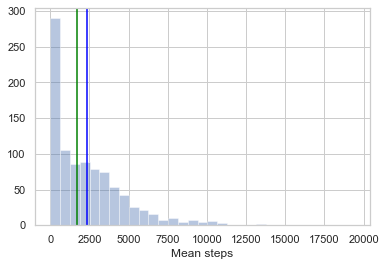

The mean is 2363.5867606133006
The median is 1697.4268292682927
The variance is 5914602.9013437545


In [178]:
median_steps = df["mean_steps"].median()
mean_steps = df["mean_steps"].mean()
variance_steps = df["mean_steps"].var()

plt.axvline(median_steps, 0, 100, color='green', label='median')
plt.axvline(mean_steps, 0, 100, color='blue', label='mean')

sns.distplot(df["mean_steps"], kde=False)
plt.xlabel("Mean steps")
plt.show()
print("The mean is " + str(mean_steps))
print("The median is " + str(median_steps))
print("The variance is " + str(variance_steps))

c:\users\beneb\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


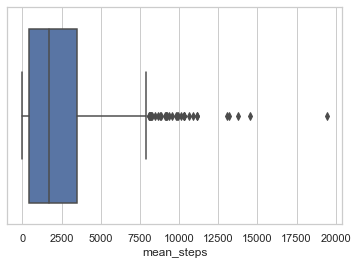

In [179]:
sns.boxplot(df["mean_steps"])
plt.show()

We can see that the data doesn't follow a normal distribution, but a right-skewed distribution. As we can see, there are many outliers, that's the reason our distribution is skewed. It is unimodal.

Let's do a violinplot using 2 different categorical variables. I chose the gender and the education.

c:\users\beneb\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_steps', ylabel='gender'>

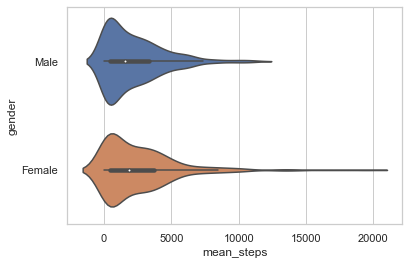

In [180]:
sns.violinplot(df["mean_steps"], df["gender"])

c:\users\beneb\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_steps', ylabel='education_1'>

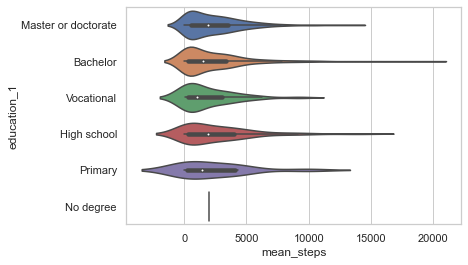

In [181]:
sns.violinplot(df["mean_steps"], df["education_1"])

c:\users\beneb\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_steps', ylabel='age'>

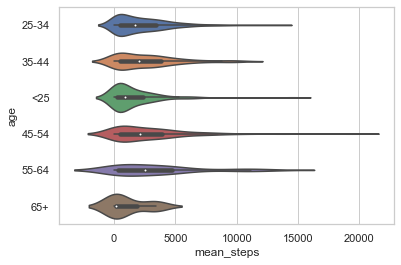

In [182]:
sns.violinplot(df["mean_steps"], df["age"])

From our plots, we can observe that women walked more than men. We can also see that people having a bachelor are those who walked the most. Age wise, people from 45 to 54 are those who walked the most



Assignement 2

For this assignment, we are going to apply correlation to the Fitbit dataset we got for Assignment 1.

Let's make a scatterplot matrix and a correlation matrix using numerical values.

<AxesSubplot:xlabel='weight', ylabel='mean_steps'>

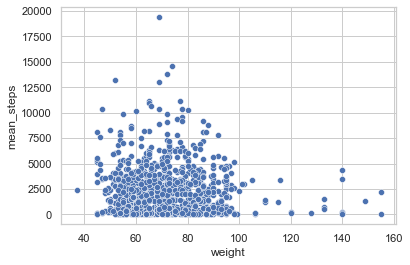

In [183]:
sns.set(style="whitegrid")
sns.scatterplot(x=df["weight"],
                y=df["mean_steps"],
                data=df)

<AxesSubplot:xlabel='mean_steps', ylabel='height'>

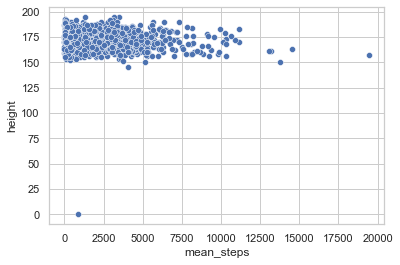

In [184]:
sns.set(style="whitegrid")
sns.scatterplot(x=df["mean_steps"],
                y=df["height"],
                data=df)

<AxesSubplot:xlabel='hh_size', ylabel='mean_steps'>

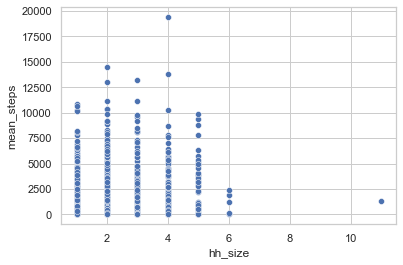

In [185]:
sns.set(style="whitegrid")
sns.scatterplot(x=df["hh_size"],
                y=df["mean_steps"],
                data=df)

In [186]:
num = df[["height", "weight", "hh_size", "mean_steps"]]
num.corr()

,height,weight,hh_size,mean_steps
height,1.000000,0.454078,-0.031736,-0.063318
weight,0.454078,1.000000,0.006322,-0.084576
hh_size,-0.031736,0.006322,1.000000,0.044081
mean_steps,-0.063318,-0.084576,0.044081,1.000000


As we can see from the scatterplots and the correlation matrix, there is a small correlation between the mean steps and the hh size (0.044), p > 0.0001.

Assignement 3

For this assignment, we will apply correlation and linear regression to the Fitbit dataset from the 2 previous assignments.

Linear regression is an algorithm used in statistics to predict a relationship between two different variables.

Let's create dummy variables of gender, education, age...

In [187]:
dummy = df[["gender", "age", "education_1"]]
dumb = pd.get_dummies(dummy)
dumb.head(10)

,gender_Female,gender_Male,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0
5,0,1,0,1,0,0,0,0,0,0,0,0,0,1
6,0,1,1,0,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,0,1,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0,0,0,1
9,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [188]:
x = dumb
y = df["mean_steps"]

lm = LinearRegression()  #this creates a new LR model
lm.fit(x, y)  #this "fits" the model

b0 = lm.intercept_  #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0]  #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X")  #.0f formats to 2 decimals.

The regression line is equal to y = -47075320755174624.00 + 113385101615440192.00X


In [189]:
df["mean_steps_p"] = lm.predict(x)  #use built-in predict() method to generate predictions; store in original dataframe
df.head(50)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,mean_steps_p
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000,2096.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951,2304.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439,2096.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585,1344.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927,2720.0
5,6,0.0,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,Lille,Male,35-44,1,1,Vocational,170.0,63.0,5554.884146,1576.0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,790.692073,2096.0
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,635.533537,2576.0
8,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Female,35-44,4,4,Vocational,172.0,69.0,2972.006098,2056.0
9,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1964.0,...,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,265.554878,2576.0


In [190]:
df["resid"] = df["mean_steps"] - df["mean_steps_p"]
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,gender,age,hh_size,education,education_1,height,weight,mean_steps,mean_steps_p,resid
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000,2096.0,3037.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951,2304.0,522.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439,2096.0,1649.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Male,<25,1,1,Bachelor,178.0,80.0,221.536585,1344.0,-1122.463415
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927,2720.0,-1845.442073


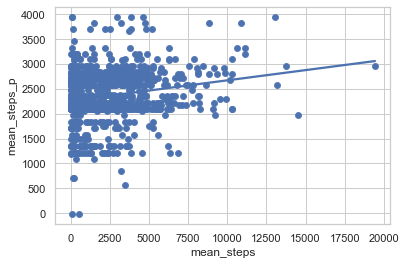

In [201]:
residual = df['mean_steps_p'] - df['mean_steps']  #Subtracting Y'-Y (Y' = predicted) gets us the residual
sns.scatterplot(x='mean_steps', y='mean_steps_p', data=df)
sns.regplot(x='mean_steps', y='mean_steps_p', data=df, ci=None)
plt.show()

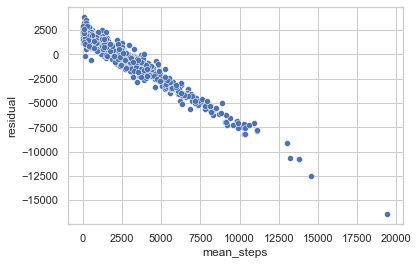

In [192]:
df['residual'] = df['mean_steps_p'] - df['mean_steps']
sns.scatterplot(x='mean_steps', y='residual', data=df)
plt.show()

In [193]:
r2_score(df['mean_steps'], df['mean_steps_p'])

0.03466976194637428

In [194]:
math.sqrt(
    mean_squared_error(df['mean_steps'], df['mean_steps_p']))  #this gives the model fit (R2) for the Y and predicted Y

2388.179039042085

Based on the R^2, We can predict 3.5% of the variation of mean steps per participant. Our typical prediction is off by 2388 steps. So as we can see here, this predictivd model is very bad.